# EDA Part 1: Census Race/Ethnicity Data
Examining the data from the 2013-2023 ACS.

### Imports

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Data

In [48]:
raceData = pd.read_csv('C:/Users/finco/Documents/GitHub/DS496Capstone/Processed Data/raceData.csv')

### Plot Settings

In [87]:
plt.rcParams['font.family'] = 'Times New Roman'
sns.set_palette("crest")

### Summary Statistics

In [88]:
raceData.describe()

,MedianAge,Hispanic,White,Black,NativeAmerican,Asian,year,district
count,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000
mean,38.490772,15.378489,53.068112,10.427718,0.621609,5.211166,2018.000000,10.148768
std,3.611534,17.778404,28.630733,13.304607,1.736888,6.338403,4.000657,10.632550
min,27.500000,0.000000,0.200000,0.000000,0.000000,0.300000,2012.000000,0.000000
25%,36.200000,3.400000,28.800000,1.900000,0.100000,1.700000,2014.000000,3.000000
50%,38.500000,9.100000,60.800000,5.200000,0.200000,3.300000,2018.000000,6.000000
75%,40.600000,20.100000,76.300000,13.100000,0.500000,5.600000,2022.000000,13.000000
max,56.000000,90.600000,96.100000,67.100000,23.500000,58.400000,2024.000000,53.000000


A couple things to note here. 

1. The average congressional district in this dataset has *significantly* more white people than other races/ethnicities. The standard deviation of the white population is larger than the average population of every other race. This could create serious errors in predictions of majority non-white districts.
2. The standard deviations of non-white populations are nearly equal with their means. This level of variance could diminish their effectiveness as features.

### Age

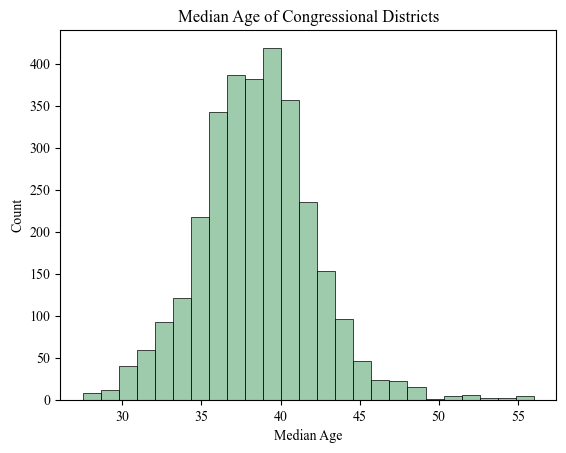

In [89]:
sns.histplot(data=raceData['MedianAge'], bins=25, linewidth = 0.5)
plt.title('Median Age of Congressional Districts')
plt.xlabel('Median Age')
plt.show()

Our age data is unimodal with a median around 38. It has a slight right skew, with a few congressional districts having a median age above 50.

### White Population

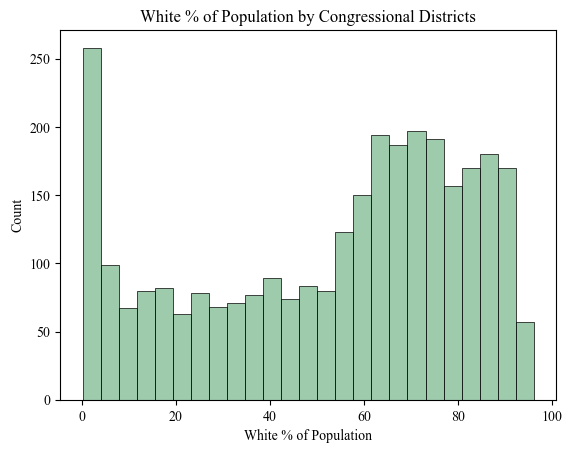

In [90]:
sns.histplot(data=raceData['White'], bins=25, linewidth = 0.5)
plt.title('White % of Population by Congressional Districts')
plt.xlabel('White % of Population')
plt.show()

While many of our congressional districts are majority white, it should be noted that there is a healthy number of majority non-white districts.

### Latino Population

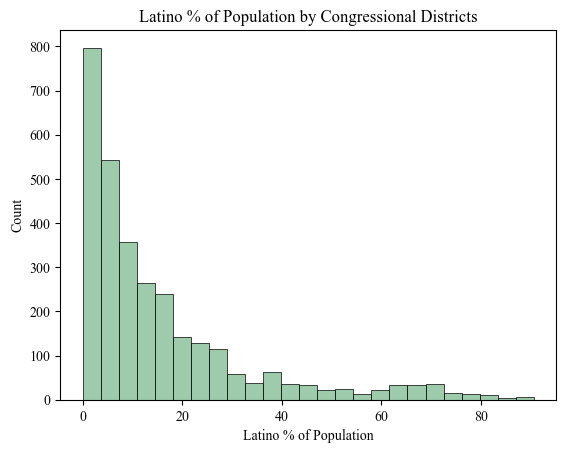

In [91]:
sns.histplot(data=raceData['Hispanic'], bins=25, linewidth = 0.5)
plt.title('Latino % of Population by Congressional Districts')
plt.xlabel('Latino % of Population')
plt.show()

The districts with a hispanic population over 60% are my focus here. These districts have experienced major shifts towards Republicans in recent years, and it's very important for the model to capture this.

### Black Population

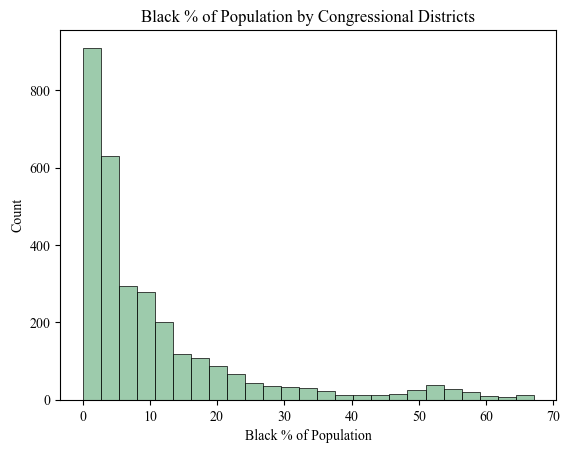

In [92]:
sns.histplot(data=raceData['Black'], bins=25, linewidth = 0.5)
plt.title('Black % of Population by Congressional Districts')
plt.xlabel('Black % of Population')
plt.show()

Starting to suspect the distributions of our non-white populations will be similar throughout. 

### Asian Population

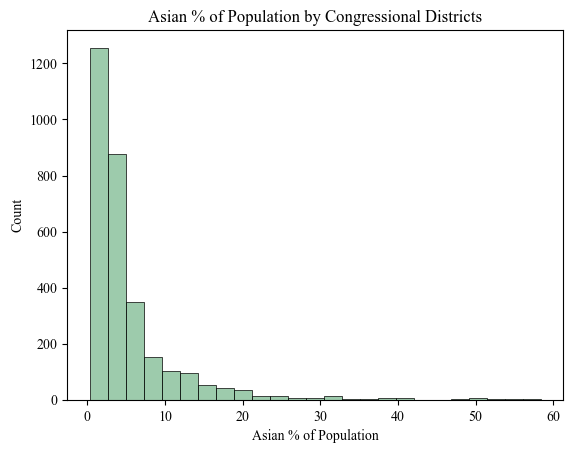

In [93]:
sns.histplot(data=raceData['Asian'], bins=25, linewidth = 0.5)
plt.title('Asian % of Population by Congressional Districts')
plt.xlabel('Asian % of Population')
plt.show()

### Native American Population

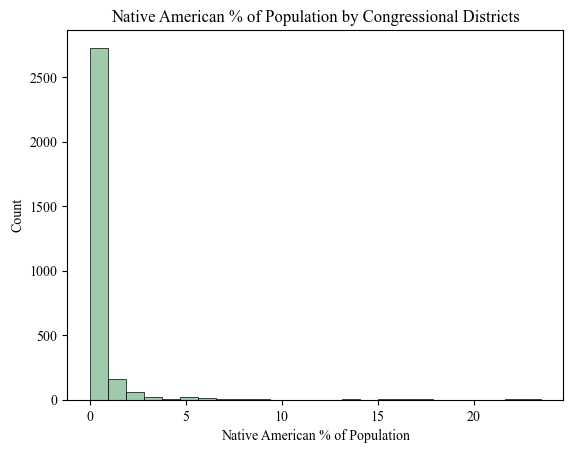

In [94]:
sns.histplot(data=raceData['NativeAmerican'], bins=25, linewidth = 0.5)
plt.title('Native American % of Population by Congressional Districts')
plt.xlabel('Native American % of Population')
plt.show()

### Correlation Heatmap

<Axes: >

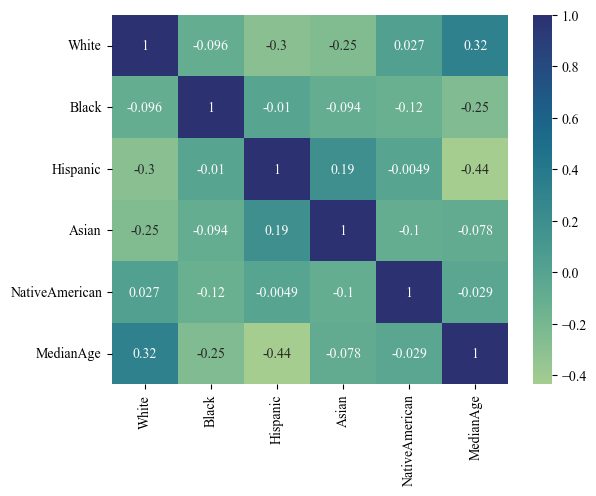

In [95]:
corrMatrix = raceData[['White', 'Black', 'Hispanic', 'Asian', 'NativeAmerican', 'MedianAge']].corr()

sns.heatmap(corrMatrix, annot=True, cmap='crest')

Thankfully, our data isn't too collinear.

### Pair Plot

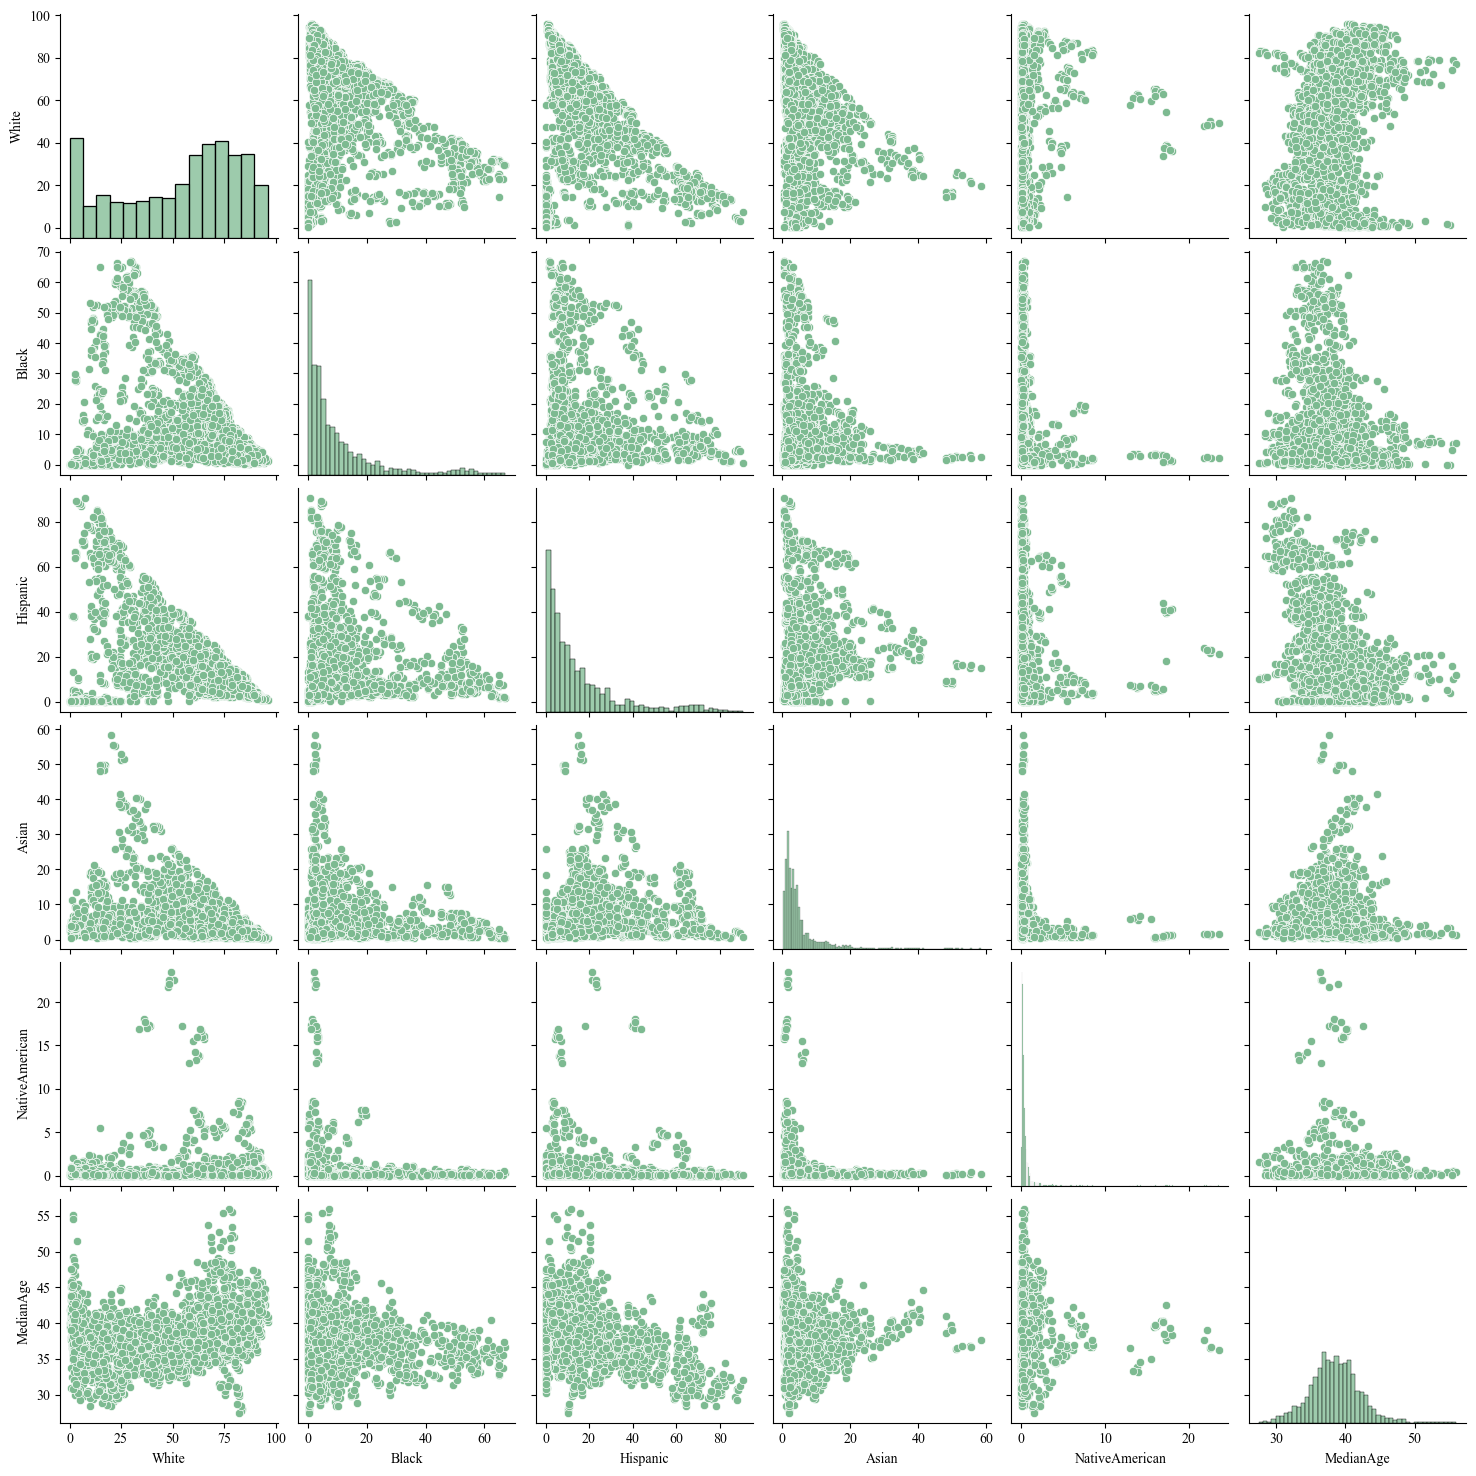

In [96]:
sns.pairplot(data=raceData[['White', 'Black', 'Hispanic', 'Asian', 'NativeAmerican', 'MedianAge']])